<a href="https://colab.research.google.com/github/juangross/cursoAM2021/blob/main/PDI_TP2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TP2)
  La propuesta para esta actividad consiste en manipular independientemente la luminancia y la saturación de una imagen. Para ello convertimos cada pixel de la imagen del espacio RGB al espacio YIQ, luego alteramos los valores de Y (para cambiar la luminancia) y/o de IQ (para cambiar la saturación). Con los nuevos valores de YIQ, convertimos a RGB nuevamente y obtenemos una nueva imagen.

**Observaciones**: para cada uno estos deben mostrar la imagen original vs el resultado de la modificación realizada a la imagen para un diferente rango de valores de prueba de Y e IQ.

La segunda parte del TP2 consiste en utilizar algunos datasets 2D (pueden ser mapas de altitud, de temperatura, etc.) y “visualizarlos” con diferentes paletas, incluyendo la de niveles de gris y la arco iris. 

**Observaciones**: el objetivo es ver cómo con diferentes paletas de colores se pueden apreciar ciertos detalles de una imagen, sin necesidad de modificar el contenido de la misma.
Les sugiero no utilizar imágenes de más de 1000 X 1000 pixeles


In [26]:
!git clone https://github.com/juangross/cAM

fatal: destination path 'cAM' already exists and is not an empty directory.


Cargo imagen de prueba


leyendo archivo: ./cAM/imagenes/patron_RGBCMYWK.png
imagen de entrada


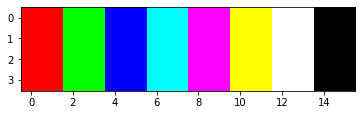

In [27]:
import matplotlib.pyplot as plt
#import matplotlib.image as mpimg
import imageio as img
import numpy as np


# Import an image from directory:
path="./cAM/imagenes/"
archi="patron_RGBCMYWK"
archo="output"
archo2="output2"
ext="png"

#formato actual

print("leyendo archivo:", f"{path}{archi}.{ext}")
#input_image= mpimg.imread(f"{archi}.{ext}")  #lee con matplotlib
input_image=img.imread(f"{path}{archi}.{ext}")      #lee con imageio

print ("imagen de entrada")
plt.imshow(input_image)

In [28]:
input_tam=input_image.shape

print("Dimensiones (X,Y,canales): ", input_tam)
print("tipo de datos: " , input_image.dtype)

print("Datos en crudo: ")
input_image[:,:,:]


Dimensiones (X,Y,canales):  (4, 16, 3)
tipo de datos:  uint8
Datos en crudo: 


Array([[[255,   0,   0],
        [255,   0,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        [  0,   0, 255],
        [  0,   0, 255],
        [  0, 255, 255],
        [  0, 255, 255],
        [255,   0, 255],
        [255,   0, 255],
        [255, 255,   0],
        [255, 255,   0],
        [255, 255, 255],
        [255, 255, 255],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[255,   0,   0],
        [255,   0,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        [  0,   0, 255],
        [  0,   0, 255],
        [  0, 255, 255],
        [  0, 255, 255],
        [255,   0, 255],
        [255,   0, 255],
        [255, 255,   0],
        [255, 255,   0],
        [255, 255, 255],
        [255, 255, 255],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[255,   0,   0],
        [255,   0,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        [  0,   0, 255],
        [  0,   0, 255],
        [  0, 255, 255],
        [  0, 255, 25

In [34]:
#creo un array nuevo pero vacío usando numpy
input_image_norm=np.zeros(input_tam, dtype=float)
#normalizo los valores correspondientes a cada canal RGB. haciendo: <valor color pixel>/256
#solamente se normaliza si el valor del color para ese canal es >0.

#normalizo la imagen
input_image_norm=1/255*input_image
#print(input_image_norm)
print(input_image_norm.shape)

#transformo a YIQ
YIQ_image_norm=np.zeros(input_tam, dtype=float)
YIQ=np.array([[0.299,0.587,0.114],[0.595716,-0.274453,-0.321263],[0.211456,-0.522591,0.311135]], dtype=float)
#print(YIQ.shape)
a=np.array([[[1 , 0],[0 , 0],[0 , 1 ],[1 , 0],[0 , 0],[0 , 1 ]]])  # dos pixels , uno rojo y otro azul, normalizados
print(a.shape)
#a.transpose((1,0,2))

#YIQ_image_norm=input_image_norm[,,:]* YIQ
#print(YIQ.T)
#YIQ_image_norm=np.dot(input_image_norm,YIQ.T.copy())
#print (YIQ_image_norm)
#for k in range (input_tam[2]):
#  for j in range(input_tam[1]):
#    for i in range(input_tam[0]):
      #si el valor del pixel es >0 lo piso con el valor nuevo
#        if(input_image_norm[i,j,k]):
        #YIQ_image_norm[i,j,k]=np.matmul(input_image_norm[i,j,k],YIQ)
#YIQ_image_norm=np.vdot(YIQ,input_image_norm)



(4, 16, 3)
(1, 6, 2)
